In [1]:
from simulation import *
from aesthetics import *
from models import *
from data import *

import numpy as np
import scipy as sc
import os as os
import re as re

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)

In [3]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [4]:
def compute_msd(trajectory, delta):
    ''' For a given time interval, compute the displacements of the angle. For small time deltas,
    there are many displacements in the trajectory. As the delta gets bigger, there are fewer
    and fewer displacements.'''
    number_measurements = len(trajectory) - delta
    print('Computing mean of {} measurements'.format(number_measurements))
    displacements = np.empty((number_measurements))
    for time in range(number_measurements):
        displacements[time] = trajectory[time + delta] - trajectory[time]
    return np.mean(displacements**2), sc.stats.sem(displacements**2)


In [27]:
data = np.genfromtxt('../../md-data/butane-rotational-diffusion/md-data/Langevin-dynamics-10fs-recording/cccc.dat')

In [22]:
distances = np.diff(data[:, 1])
flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
unwrapped_data = np.copy(data)
for subtraction in flips: 
    unwrapped_data[subtraction + 1:, 1] -= 360
for addition in flops: 
    unwrapped_data[addition + 1:, 1] += 360
unwrapped_positions = unwrapped_data[:, 1]

KeyboardInterrupt: 

In [28]:
delays = np.arange(10000, len(data) - 1, 10000)
# MSDs = np.empty((len(delays)))
# SEMs = np.empty((len(delays)))
# for delay in delays:
#     MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)

In [29]:
import pickle as pickle
# results = np.concatenate((MSDs, SEMs))
# np.save('cccc-original-MSDs-and-SEMs.pickle', results, allow_pickle=True)
arrays = np.load('cccc-original-MSDs-and-SEMs.pickle.npy')
MSDs = arrays[0:len(arrays)/2]
SEMs = arrays[len(arrays)/2:]

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [38]:
times = delays * 10**-14

In [42]:
slope, intercept, r_value, p_value, std_err = sc.stats.linregress(times, MSDs)
print('{0:2.2e} +/- {1:2.2e}'.format(slope, std_err))
slope, intercept, r_value, p_value, std_err = sc.stats.linregress(delays, MSDs)


5.14e+14 +/- 8.21e+13


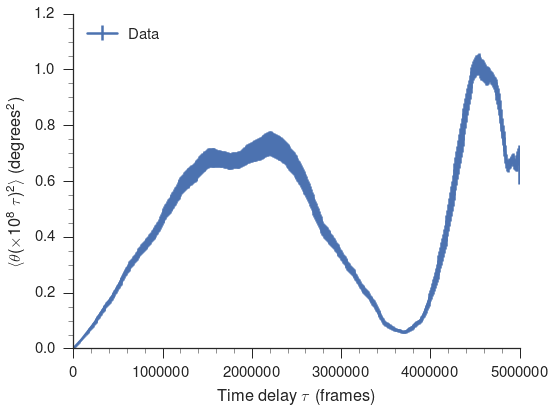

In [58]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
ax1.errorbar(delays, MSDs, yerr=100*SEMs, label='Data')
# ax1.plot(delays, slope*delays + intercept, c='k', ls='--', label='Fit')
ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
ax1.set_xlabel(r'Time delay $\tau$ (frames)')
ax1.legend(loc=2)
pretty_plot(fig)

In [9]:
runs = range(1, 100)
prefix = '/home/dslochower/data/projects/nonequilibrium/'
squared_displacement = np.empty((len(runs)))
end_points = np.empty((len(runs)))
end_positions = 250000

slopes = np.empty((len(runs)))
sems = np.empty((len(runs)))
# fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))


for run in runs:
    print(run)
    try: 
        os.chdir(prefix + 'md-data//butane-rotational-diffusion/entropy-md-data/'+str(run))
        datum = np.genfromtxt('cccc.dat')
        distances = np.diff(datum[:, 1])
        flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
        flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
        unwrapped_datum = np.copy(datum)
        for subtraction in flips: 
            unwrapped_datum[subtraction + 1:, 1] -= 360
        for addition in flops: 
            unwrapped_datum[addition + 1:, 1] += 360
        unwrapped_positions = unwrapped_datum[:, 1]
        
        
        
        
        delays = np.arange(10000, len(unwrapped_positions) - 1, 100000)
        MSDs = np.empty((len(delays)))
        SEMs = np.empty((len(delays)))
        for delay in delays:
            MSDs[np.where(delays==delay)[0]], SEMs[np.where(delays==delay)[0]] = compute_msd(unwrapped_positions, delay)
            
        # ax1.plot(delays, MSDs, alpha=0.5)
        times = delays * 10**-14
        slope, intercept, r_value, p_value, std_err = sc.stats.linregress(times, MSDs)
        slopes[run -1] = slope
        sems[run - 1] = std_err
        
        # squared_displacement[run - 1] = (unwrapped_positions[end_positions] - unwrapped_positions[0])**2 / ((end_positions / 500000)*5 * 10**-9)
        # end_points[run - 1] = unwrapped_positions[-1]
        os.chdir(prefix + 'md-data//butane-rotational-diffusion/entropy-md-data/')
    except:
        squared_displacement[run - 1] = np.nan
        end_points[run - 1] = np.nan
    # gc.collect()
# ax1.set_ylabel(r'$\langle \theta(\tau)^2 \rangle$ (degrees$^2$)')
# ax1.set_xlabel(r'Time delay $\tau$ (frames)')
# ax1.legend(loc=2)
# pretty_plot(fig)


1
Computing mean of 490000 measurements
Computing mean of 390000 measurements
Computing mean of 290000 measurements
Computing mean of 190000 measurements
Computing mean of 90000 measurements
2
Computing mean of 490000 measurements
Computing mean of 390000 measurements
Computing mean of 290000 measurements
Computing mean of 190000 measurements
Computing mean of 90000 measurements
3
Computing mean of 490000 measurements
Computing mean of 390000 measurements
Computing mean of 290000 measurements
Computing mean of 190000 measurements
Computing mean of 90000 measurements
4
Computing mean of 490000 measurements
Computing mean of 390000 measurements
Computing mean of 290000 measurements
Computing mean of 190000 measurements
Computing mean of 90000 measurements
5
Computing mean of 490000 measurements
Computing mean of 390000 measurements
Computing mean of 290000 measurements
Computing mean of 190000 measurements
Computing mean of 90000 measurements
6
Computing mean of 490000 measurements
Compu

In [10]:
slopes

array([  1.54500791e+15,   4.99876479e+15,   9.54124086e+14,
         2.63515118e+15,   3.38319640e+15,   4.30918005e+15,
         1.38372143e+15,   2.64308797e+14,   6.92749804e+15,
         5.48426382e+15,   1.18591562e+13,   4.41957575e+14,
         7.53820158e+14,   8.02041005e+15,   3.26841760e+15,
         8.59998167e+14,   2.41440577e+15,   1.54322452e+14,
         4.44583403e+15,   1.01840271e+15,   1.62140017e+15,
         4.63185492e+15,   8.62451133e+15,   3.03380989e+15,
         1.24333787e+16,   1.34595538e+15,   2.34356779e+15,
         1.73282436e+14,   9.44645137e+14,   5.64353847e+15,
         1.89327868e+14,   6.05515255e+15,   1.27591895e+15,
         7.55985479e+14,   5.21834949e+15,   5.37407872e+15,
         4.24424183e+14,   1.50250807e+16,   5.19350387e+14,
         3.46554357e+13,   1.58834697e+14,   6.35753209e+15,
         2.60195356e+15,   4.64025366e+15,   7.83357924e+13,
         7.56051067e+15,   4.26715295e+14,   2.37856628e+15,
         2.43536937e+14,

In [13]:
print('{0:2.2e} +/- {1:2.2e}'.format(np.mean(slopes), np.mean(sems)))

3.54e+15 +/- 7.88e+14


In [ ]:
MSD = np.mean(squared_displacement[~np.isnan(squared_displacement)])
SEM = sc.stats.sem(squared_displacement[~np.isnan(squared_displacement)])
print('{0:2.2e} +/- {1:2.2e}'.format(MSD, SEM))

In [ ]:
end_points

In [9]:
end_points**2

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,               inf,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,               inf,   0.00000000e+000,
         0.00000000e+000,               inf,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   1.37995447e+269,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   3.33316885e-058,   0.00000000e+000,
         0.00000000e+000,               inf,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+

In [63]:
fig, ax1 = fig.add_subplots(111)
plt.hist(end_points)
pretty_plot(fig)

AttributeError: 'Figure' object has no attribute 'add_subplots'

In [55]:
print(np.nan)

nan


In [56]:
tmp = np.array([0, 1, np.nan, 3, 4])

In [58]:
print(tmp)

[  0.   1.  nan   3.   4.]


In [59]:
np.mean(tmp)

nan

In [61]:
np.mean(~np.isnan(tmp))

0.80000000000000004

In [64]:
np.isnan(end_points)

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False], dtype=bool)

In [ ]:
    "When plotting $\\langle \\theta(\\tau)^2 \\rangle$, the slope of the plots (on the left) should be $2D$ yet cleary they are not linear. It's typical to take the middle 80% of the data to calculate the slope, because the statistics are nosiy when the time dela is a very large part or very small part of the trajectory."

    
        "ten_percent = 0.1*len(delays)\n",
    "ninety_percent = 0.9*len(delays)\n",
    "slope, intercept, r_value, p_value, std_err = stats.linregress(delays[ten_percent:ninety_percent]*10**-14,\n",
    "                                                               MSDs[ten_percent:ninety_percent])\n"


In [ ]:
    "# Femtosecond is 10**-15\n",
    "# Each frame is 10 fs = 10**-14\n",
    "fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))\n",
    "fig.subplots_adjust(wspace=0.2)\n",
    "ax1.errorbar(delays*10**-14, MSDs, yerr=SEMs)\n",
    "ax1.plot(delays[ten_percent:ninety_percent]*10**-14, MSDs[ten_percent:ninety_percent], c='r', label='Data used for fit')\n",
    "ax1.set_ylabel(r'$\\langle \\theta(\\tau)^2 \\rangle$ (degrees$^2$)')\n",
    "ax1.set_xlabel(r'Time delay $\\tau$ (seconds)')\n",
    "ax1.legend()\n",
    "\n",
    "ax2.errorbar(delays*10**-14, MSDs, yerr=SEMs)\n",
    "ax2.plot(delays[ten_percent:ninety_percent]*10**-14, slope*delays[ten_percent:ninety_percent]*10**-14+intercept, c='g', ls='-', label='Linear fit')\n",
    "ax2.plot(delays[0:ten_percent]*10**-14, slope*delays[0:ten_percent]*10**-14+intercept, c='g', ls='--')\n",
    "ax2.plot(delays[ninety_percent:]*10**-14, slope*delays[ninety_percent:]*10**-14+intercept, c='g', ls='--')\n",
    "ax2.set_ylabel(r'$\\langle \\theta(\\tau)^2 \\rangle$ (degrees$^2$)')\n",
    "ax2.set_xlabel(r'Time delay $\\tau$ (seconds)')\n",
    "ax2.ticklabel_format(style='sci', axis='both', scilimits=(0,0))\n",
    "ax2.xaxis.major.formatter._useMathText = True\n",
    "ax2.legend()\n"


In [3]:
print(slope)
print(slope/2)

NameError: name 'slope' is not defined

In [8]:
runs = range(1, 100)
prefix = '/home/dslochower/projects/nonequilibrium/md-data/butane-rotational-diffusion/entropy-md-data/'
squared_displacement = np.empty((len(runs)))
end_points = np.empty((len(runs)))
end_positions = 250000

for run in runs:
    print(run)
    try: 
        os.chdir(prefix + str(run))
        datum = np.genfromtxt('cccc.dat')
        distances = np.diff(datum[:, 1])
        flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
        flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement
        unwrapped_datum = np.copy(datum)
        for subtraction in flips: 
            unwrapped_datum[subtraction + 1:, 1] -= 360
        for addition in flops: 
            unwrapped_datum[addition + 1:, 1] += 360
        unwrapped_positions = unwrapped_datum[:, 1]
        # ax1.plot(unwrapped_positions, alpha=0.5)
        # ax2.plot(autocorr(unwrapped_positions), alpha=0.5)
        # degrees**2 per 5 ns
        squared_displacement[run - 1] = (unwrapped_positions[end_positions] - unwrapped_positions[0])**2 / ((end_positions / 500000)*5 * 10**-9)
        end_points[run - 1] = unwrapped_positions[-1]
        os.chdir(prefix)
    except:
        squared_displacement[run - 1] = np.nan
        end_points[run - 1] = np.nan
    # gc.collect()
# ax1.set_ylabel(r'$\\theta$ (degrees)')
# ax1.set_xlabel(r'Time (frames)')
# ax2.set_xlabel(r'Time (frames)')
# ax2.set_ylabel('Autocorrelation')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [9]:
MSD = np.mean(squared_displacement[~np.isnan(squared_displacement)])
SEM = sc.stats.sem(squared_displacement[~np.isnan(squared_displacement)])
print('{0:2.2e} +/- {1:2.2e}'.format(MSD, SEM))

3.29e+15 +/- 4.53e+14


# Perhaps I can extract and save a valid jupyter notebook file from `diffusion` around line 183128

In [ ]:
diffusion-183273-    "We have $5.4 \\times 10^{13}$ (degrees$^2$/second) = $2D$, so D = $2.7 \\times 10^{13}$ (degrees$^2$/second). This is not that much smaller than `C_intrasurface`!\n",
diffusion-183274-    "\n",
diffusion:183275:    "From the other notebook, we determined the probability to go left (or right) into another bin (6 degrees) in 10 fs is 0.2143 (0.5446 to stay in the same bin). Thus, we wrote:\n",
diffusion-183276-    "$$\n",
diffusion-183277-    "\\Delta P_i = -2C \\Delta t\n",
diffusion-183278-    "(1 - 0.5446) = -2C(1 \\times 10^{-14} \\text{second})\n",
diffusion-183279-    "C = 2.28 \\times 10^{13} \\text{second}^{-1}\n",
diffusion-183280-    "$$\n",
--
diffusion-183285-    "C &= 2.28 \\times 10^{13}  \\cdot \\text{second}^{-1} \\times \\text{6 degrees} \\quad \\text{and, so} \\\\\n",
diffusion-183286-    "C_\\text{intrasurface} &= 3.8 \\times 10^{12} \\text{degrees} \\cdot \\text{second}^{-1}\n",
diffusion-183287-    "\\end{align}\n",
diffusion-183288-    "$$\n",
diffusion-183289-    "\n",
diffusion:183290:    "Thus, $D =  2.7 \\times 10^{13}$ (degrees$^2$/second) and $C_\\text{intrasurface} = 3.8 \\times 10^{12} \\text{degrees} \\cdot \\text{second}^{-1}$. Not sure about units."
